In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Loading and displaying the datasets**

In [ ]:
import pandas as pd
# Loading the datasets from csv format to a dataframe
taxi_trip_data = pd.read_csv('/content/drive/MyDrive/Dataset_PHA/TaxiTrips_BronxOrigin2023.csv')
weather_data = pd.read_csv('/content/drive/MyDrive/Dataset_PHA/Bronx_Weather_Data2023.csv')
zone_lookup = pd.read_csv('/content/drive/MyDrive/Dataset_PHA/taxi_zone_lookup.csv')

In [ ]:
# Displaying the dataset
taxi_trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID
0,2023-01-01 0:08,2023-01-01 0:41,1.0,25.84,60,265
1,2023-01-01 0:27,2023-01-01 0:32,1.0,1.03,159,168
2,2023-01-01 0:16,2023-01-01 0:16,4.0,0.00,174,174
3,2023-01-01 0:00,2023-01-01 0:26,1.0,0.00,136,233
4,2023-01-01 1:51,2023-01-01 1:52,1.0,0.50,168,247


In [ ]:
weather_data.head()

,Unnamed: 0,date,temperature_2m,precipitation,rain,snowfall
0,0,2023-01-01 00:00:00+00:00,9.743500,0.4,0.4,0.0
1,1,2023-01-01 01:00:00+00:00,10.593500,1.2,1.2,0.0
2,2,2023-01-01 02:00:00+00:00,11.143499,0.7,0.7,0.0
3,3,2023-01-01 03:00:00+00:00,11.043500,2.2,2.2,0.0
4,4,2023-01-01 04:00:00+00:00,10.843500,1.7,1.7,0.0


In [ ]:
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


**Cleaning Taxi Trip Data**

In [ ]:
taxi_trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66000 entries, 0 to 65999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   66000 non-null  object 
 1   tpep_dropoff_datetime  66000 non-null  object 
 2   passenger_count        60248 non-null  float64
 3   trip_distance          65962 non-null  float64
 4   PULocationID           66000 non-null  int64  
 5   DOLocationID           66000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
zone_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8760 non-null   int64  
 1   date            8760 non-null   object 
 2   temperature_2m  8760 non-null   float64
 3   precipitation   8760 non-null   float64
 4   rain            8760 non-null   float64
 5   snowfall        8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [ ]:
# Remove rows with missing trip_distance
taxi_trip_data_cleaned = taxi_trip_data.dropna(subset=['trip_distance'])

In [ ]:
# Remove extreme outliers in trip_distance by keeping only reasonable values
taxi_trip_data_cleaned = taxi_trip_data_cleaned[taxi_trip_data_cleaned['trip_distance'] <= 100]

In [ ]:
# Filling passenger_count column's missing values with median value
taxi_trip_data_cleaned['passenger_count'] = taxi_trip_data_cleaned['passenger_count'].fillna(taxi_trip_data_cleaned['passenger_count'].median())

In [ ]:
# Convert pickup and dropoff columns to datetime format
taxi_trip_data_cleaned['tpep_pickup_datetime'] = pd.to_datetime(taxi_trip_data_cleaned['tpep_pickup_datetime'])
taxi_trip_data_cleaned['tpep_dropoff_datetime'] = pd.to_datetime(taxi_trip_data_cleaned['tpep_dropoff_datetime'])

In [ ]:
print(taxi_trip_data_cleaned['tpep_pickup_datetime'])

0       2023-01-01 00:08:00
1       2023-01-01 00:27:00
2       2023-01-01 00:16:00
3       2023-01-01 00:00:00
4       2023-01-01 01:51:00
                ...        
65995   2023-12-31 23:16:00
65996   2023-12-31 23:08:00
65997   2023-12-31 23:33:00
65998   2023-12-31 23:38:00
65999   2023-12-31 23:04:00
Name: tpep_pickup_datetime, Length: 65938, dtype: datetime64[ns]


In [ ]:
# Extracting useful time-based features like hour, day of the week, month from pickup time
taxi_trip_data_cleaned['pickup_hour'] = taxi_trip_data_cleaned['tpep_pickup_datetime'].dt.hour
taxi_trip_data_cleaned['pickup_day'] = taxi_trip_data_cleaned['tpep_pickup_datetime'].dt.dayofweek
taxi_trip_data_cleaned['pickup_month'] = taxi_trip_data_cleaned['tpep_pickup_datetime'].dt.month

In [ ]:
print(taxi_trip_data_cleaned['pickup_month'].tail())
print(taxi_trip_data_cleaned['pickup_day'].tail())
print(taxi_trip_data_cleaned['pickup_hour'].head())

65995    12
65996    12
65997    12
65998    12
65999    12
Name: pickup_month, dtype: int32
65995    6
65996    6
65997    6
65998    6
65999    6
Name: pickup_day, dtype: int32
0    0
1    0
2    0
3    0
4    1
Name: pickup_hour, dtype: int32


**Cleaning Weather Data**

In [ ]:
# Drop the 'Unnamed' column
weather_data_cleaned = weather_data.drop(columns=['Unnamed: 0'])

#Convert 'date' to datetime format
weather_data_cleaned['date'] = pd.to_datetime(weather_data_cleaned['date'])

In [ ]:
print(weather_data_cleaned['date'])

0      2023-01-01 00:00:00+00:00
1      2023-01-01 01:00:00+00:00
2      2023-01-01 02:00:00+00:00
3      2023-01-01 03:00:00+00:00
4      2023-01-01 04:00:00+00:00
                  ...           
8755   2023-12-31 19:00:00+00:00
8756   2023-12-31 20:00:00+00:00
8757   2023-12-31 21:00:00+00:00
8758   2023-12-31 22:00:00+00:00
8759   2023-12-31 23:00:00+00:00
Name: date, Length: 8760, dtype: datetime64[ns, UTC]


**Cleaning Zone Look Up Data**

In [ ]:
# Drop rows with missing Borough, Zone, or service_zone
zone_lookup_cleaned = zone_lookup.dropna(subset=['Borough', 'Zone', 'service_zone'])

In [ ]:
taxi_trip_data_cleaned.info()
zone_lookup_cleaned.info()
weather_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65938 entries, 0 to 65999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   65938 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  65938 non-null  datetime64[ns]
 2   passenger_count        65938 non-null  float64       
 3   trip_distance          65938 non-null  float64       
 4   PULocationID           65938 non-null  int64         
 5   DOLocationID           65938 non-null  int64         
 6   pickup_hour            65938 non-null  int32         
 7   pickup_day             65938 non-null  int32         
 8   pickup_month           65938 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(3), int64(2)
memory usage: 4.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        ---------

**Aggregating the taxi trip and weather data**

In [ ]:
# Since the weather data is recorded on an hourly basis, it is important to merge it with the taxi trip data based on the pickup hour.
# Need to aggregate the trip data with weather data to calculate the hourly taxi demand

# Creating a new column in taxi trip data with just the hour
taxi_trip_data_cleaned['pickup_hour_only'] = taxi_trip_data_cleaned['tpep_pickup_datetime'].dt.floor('h')

# Aggregating taxi trip data by pickup hour to get hourly demand
hourly_taxi_demand = taxi_trip_data_cleaned.groupby('pickup_hour_only').size().reset_index(name='taxi_demand')

In [ ]:
#Ensuring the weather data's date column is hourly
weather_data_cleaned['hour_only'] = weather_data_cleaned['date'].dt.floor('h')

In [ ]:
#Removing the time zone from the 'hour_only' column in weather data
weather_data_cleaned['hour_only'] = weather_data_cleaned['hour_only'].dt.tz_convert(None)

#Merging hourly taxi demand with weather data on the hour timestamp
merged_data = pd.merge(hourly_taxi_demand, weather_data_cleaned, left_on='pickup_hour_only', right_on='hour_only', how='inner')

In [ ]:
#Select the relevant features for the merged dataset
bronx_demand_weather_data = merged_data[['pickup_hour_only', 'taxi_demand', 'temperature_2m', 'precipitation', 'rain', 'snowfall']]

In [ ]:
bronx_demand_weather_data.head()

,pickup_hour_only,taxi_demand,temperature_2m,precipitation,rain,snowfall
0,2023-01-01 00:00:00,8,9.743500,0.4,0.4,0.0
1,2023-01-01 01:00:00,4,10.593500,1.2,1.2,0.0
2,2023-01-01 02:00:00,6,11.143499,0.7,0.7,0.0
3,2023-01-01 03:00:00,8,11.043500,2.2,2.2,0.0
4,2023-01-01 04:00:00,9,10.843500,1.7,1.7,0.0


**Merging the taxi trip and Weather data with the Zone Look Up data**

In [ ]:
#Aggregating taxi trip data by pickup hour and PULocationID to calculate zone-specific demand per hour
zone_hourly_taxi_demand = taxi_trip_data_cleaned.groupby(['pickup_hour_only', 'PULocationID']).size().reset_index(name='taxi_demand_per_zone')

In [ ]:
#Merging the resulting zone demand data with the zone lookup table to get zone names
zone_hourly_demand_with_zones = pd.merge(
    zone_hourly_taxi_demand,
    zone_lookup_cleaned[['LocationID', 'Borough', 'Zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

In [ ]:
#Filtering the data with Borough as only Bronx
zone_hourly_demand_bronx = zone_hourly_demand_with_zones[zone_hourly_demand_with_zones['Borough'] == 'Bronx']

In [ ]:
#Merging the Bronx-specific zone demand with the weather data using 'pickup_hour_only'
final_zone_specific_demand_data = pd.merge(
    zone_hourly_demand_bronx,
    bronx_demand_weather_data,
    on='pickup_hour_only',
    how='left')

In [ ]:
#Selecting relevant columns
final_demand_data = final_zone_specific_demand_data[['pickup_hour_only', 'Zone', 'taxi_demand_per_zone', 'temperature_2m', 'precipitation', 'rain', 'snowfall']]

In [ ]:
final_demand_data.tail(50)

,pickup_hour_only,Zone,taxi_demand_per_zone,temperature_2m,precipitation,rain,snowfall
51733,2023-12-31 21:00:00,Mount Hope,1,5.9435,0.0,0.0,0.0
51734,2023-12-31 21:00:00,Norwood,2,5.9435,0.0,0.0,0.0
51735,2023-12-31 21:00:00,Parkchester,1,5.9435,0.0,0.0,0.0
51736,2023-12-31 21:00:00,Pelham Parkway,1,5.9435,0.0,0.0,0.0
51737,2023-12-31 21:00:00,Riverdale/North Riverdale/Fieldston,1,5.9435,0.0,0.0,0.0
51738,2023-12-31 21:00:00,Soundview/Bruckner,2,5.9435,0.0,0.0,0.0
51739,2023-12-31 21:00:00,Spuyten Duyvil/Kingsbridge,1,5.9435,0.0,0.0,0.0
51740,2023-12-31 21:00:00,University Heights/Morris Heights,1,5.9435,0.0,0.0,0.0
51741,2023-12-31 21:00:00,Van Nest/Morris Park,1,5.9435,0.0,0.0,0.0
51742,2023-12-31 21:00:00,West Concourse,2,5.9435,0.0,0.0,0.0


**Baseline Model along with one-hot encoding using Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Extracting useful time features from 'pickup_hour_only'
final_demand_data['pickup_hour_only'] = pd.to_datetime(final_demand_data['pickup_hour_only'])
final_demand_data['hour'] = final_demand_data['pickup_hour_only'].dt.hour
final_demand_data['day_of_week'] = final_demand_data['pickup_hour_only'].dt.dayofweek

<ipython-input-32-616cf348a9d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_demand_data['pickup_hour_only'] = pd.to_datetime(final_demand_data['pickup_hour_only'])
<ipython-input-32-616cf348a9d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_demand_data['hour'] = final_demand_data['pickup_hour_only'].dt.hour
<ipython-input-32-616cf348a9d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# One-hot encoding the 'Zone' column to handle categorical data
final_demand_data_encoded = pd.get_dummies(final_demand_data, columns=['Zone'], drop_first=True)

In [ ]:
# Selecting features and target variable
# Adding the one-hot encoded Zone columns along with the other features
features = ['hour', 'day_of_week', 'temperature_2m', 'precipitation', 'rain', 'snowfall'] + \
           [col for col in final_demand_data_encoded.columns if 'Zone_' in col]

target = 'taxi_demand_per_zone'

#Split the data into X (features) and y (target)
X = final_demand_data_encoded[features]
y = final_demand_data_encoded[target]

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the baseline Linear Regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 0.37961187605810043
Mean Absolute Error (MAE): 0.40606045719586153


In [ ]:
test_sample = X_test.head(5)
pred_sample = y_pred[:5]

# Creating a DataFrame to show the features, actual, and predicted demand
test_results_sample = test_sample.copy()
test_results_sample['Actual_Demand'] = y_test.head(5).values
test_results_sample['Predicted_Demand'] = pred_sample

test_results_sample


,hour,day_of_week,temperature_2m,precipitation,rain,snowfall,Zone_Bedford Park,Zone_Belmont,Zone_Bronx Park,Zone_Bronxdale,...,Zone_Van Cortlandt Park,Zone_Van Cortlandt Village,Zone_Van Nest/Morris Park,Zone_West Concourse,Zone_West Farms/Bronx River,Zone_Westchester Village/Unionport,Zone_Williamsbridge/Olinville,Zone_Woodlawn/Wakefield,Actual_Demand,Predicted_Demand
5297,22,2,14.643499,0.0,0.0,0.00,False,False,False,False,...,False,False,False,False,False,False,False,True,1,1.093165
21579,4,1,19.443500,0.0,0.0,0.00,True,False,False,False,...,False,False,False,False,False,False,False,False,1,1.250698
6778,9,1,0.993500,1.2,0.1,0.77,False,False,False,False,...,False,False,False,False,False,False,False,False,1,1.237431
33102,19,0,32.443500,0.0,0.0,0.00,False,True,False,False,...,False,False,False,False,False,False,False,False,1,1.060396
31710,5,5,21.143500,0.0,0.0,0.00,False,False,False,False,...,False,False,False,False,False,False,False,False,1,1.114099


**XGBoost with Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Initializing the scaler
scaler = StandardScaler()

# Fitting and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data
X_test_scaled = scaler.transform(X_test)

# Initializing the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)

# Training the model
xgb_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Model - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Model - Mean Absolute Error (MAE): {mae_xgb}")

XGBoost Model - Mean Squared Error (MSE): 0.3604640724253247
XGBoost Model - Mean Absolute Error (MAE): 0.3923027768401643


**Data Visualization to understand the data**

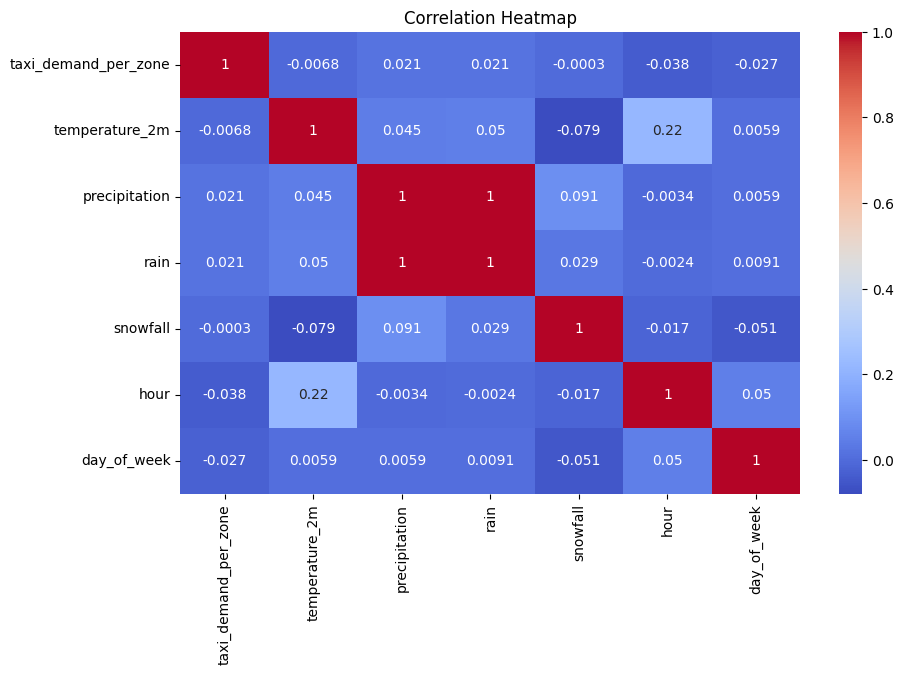

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlations
corr_matrix = final_demand_data[['taxi_demand_per_zone', 'temperature_2m', 'precipitation', 'rain', 'snowfall', 'hour', 'day_of_week']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


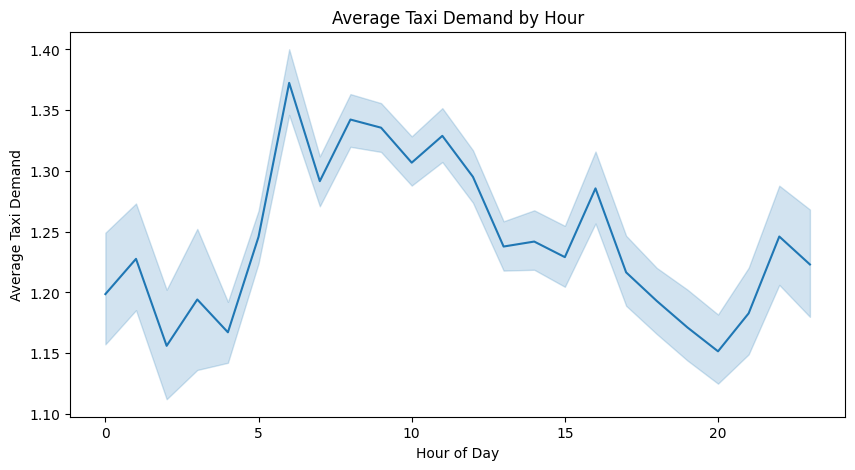

In [ ]:
#Average demand by hour of day
plt.figure(figsize=(10, 5))
sns.lineplot(data=final_demand_data, x='hour', y='taxi_demand_per_zone', estimator='mean')
plt.title('Average Taxi Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Taxi Demand')
plt.show()

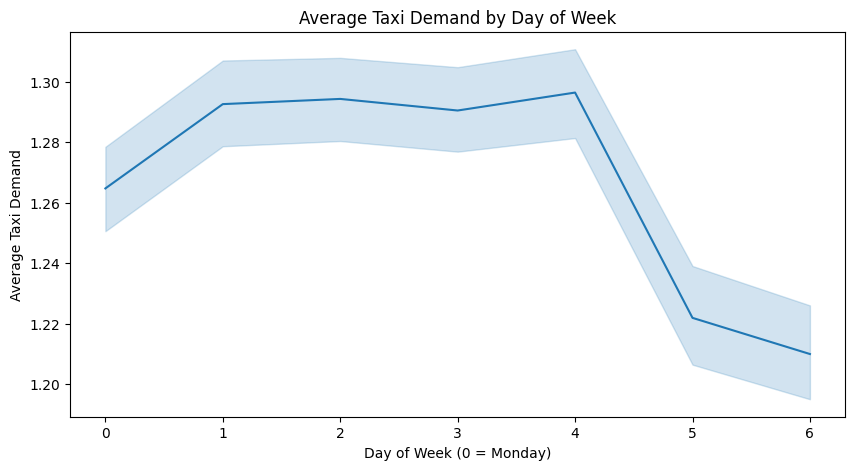

In [ ]:
#Average demand by day of the week
plt.figure(figsize=(10, 5))
sns.lineplot(data=final_demand_data, x='day_of_week', y='taxi_demand_per_zone', estimator='mean')
plt.title('Average Taxi Demand by Day of Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('Average Taxi Demand')
plt.show()


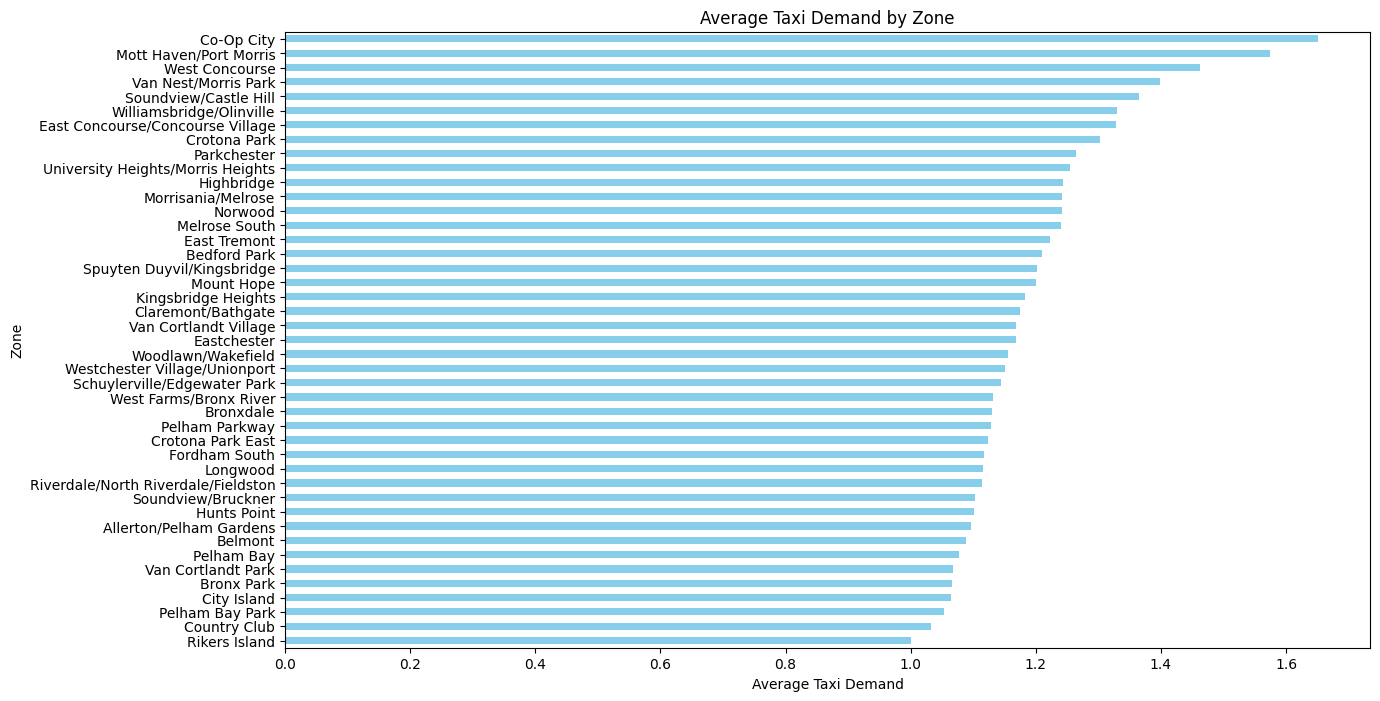

In [ ]:
#Average demand by zone
plt.figure(figsize=(14, 8))
zone_demand = final_demand_data.groupby('Zone')['taxi_demand_per_zone'].mean().sort_values()
zone_demand.plot(kind='barh', color='skyblue')
plt.title('Average Taxi Demand by Zone')
plt.xlabel('Average Taxi Demand')
plt.ylabel('Zone')
plt.show()

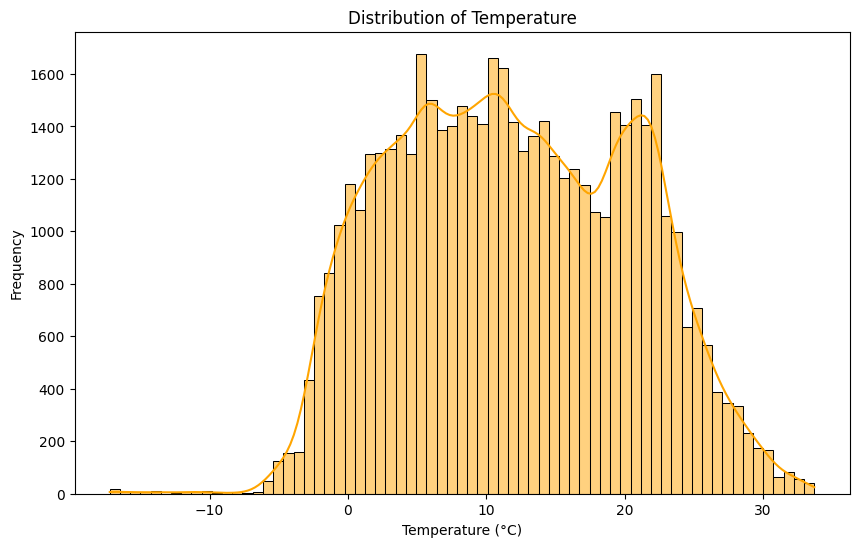

In [ ]:
# Histogram of temperature
plt.figure(figsize=(10, 6))
sns.histplot(final_demand_data['temperature_2m'], kde=True, color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

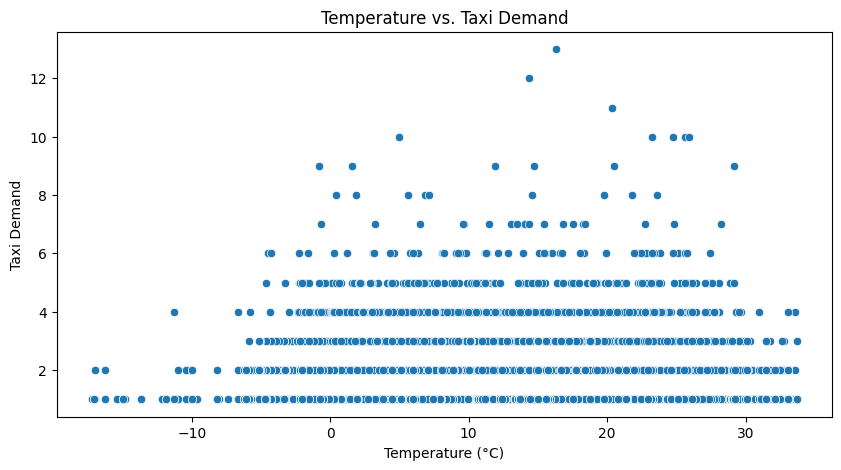

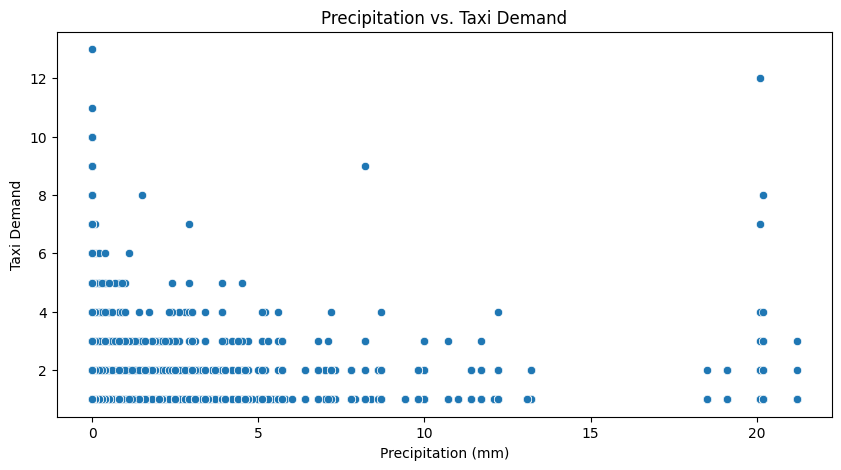

In [ ]:
# Temperature vs. Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=final_demand_data, x='temperature_2m', y='taxi_demand_per_zone')
plt.title('Temperature vs. Taxi Demand')
plt.xlabel('Temperature (°C)')
plt.ylabel('Taxi Demand')
plt.show()

# Precipitation vs. Demand
plt.figure(figsize=(10, 5))
sns.scatterplot(data=final_demand_data, x='precipitation', y='taxi_demand_per_zone')
plt.title('Precipitation vs. Taxi Demand')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Taxi Demand')
plt.show()


**Feature Engineering**

In [ ]:
# Adding feature for weekend
final_demand_data['is_weekend'] = final_demand_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Adding features for rush hours
final_demand_data['is_rush_hour_morning'] = final_demand_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 else 0)
final_demand_data['is_rush_hour_evening'] = final_demand_data['hour'].apply(lambda x: 1 if 17 <= x <= 19 else 0)

# Interaction between precipitation and rush hour
final_demand_data['precipitation_rush_hour'] = final_demand_data['precipitation'] * (final_demand_data['is_rush_hour_morning'] + final_demand_data['is_rush_hour_evening'])

<ipython-input-43-bda06302f8eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_demand_data['is_weekend'] = final_demand_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


**Improved Model with label encoding and XGBoost with hyperparameter tuning**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Zone' feature to correctly handle the categorical data
label_encoder = LabelEncoder()
final_demand_data['Zone_encoded'] = label_encoder.fit_transform(final_demand_data['Zone'])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining features with new features and label-encoded Zone
features = [
    'hour', 'day_of_week', 'temperature_2m', 'precipitation', 'rain', 'snowfall',
    'is_weekend', 'is_rush_hour_morning', 'is_rush_hour_evening', 'precipitation_rush_hour',
    'Zone_encoded'
]
target = 'taxi_demand_per_zone'

# Split the data
X = final_demand_data[features]
y = final_demand_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initializing the base XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setting up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fitting the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator from the grid search
best_xgb_model = grid_search.best_estimator_

# Displaying the best parameters found by GridSearchCV
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")

# Training the best model on the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Making predictions with the tuned model on the test set
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Model (Tuned) - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Model (Tuned) - Mean Absolute Error (MAE): {mae_xgb}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters from GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBoost Model (Tuned) - Mean Squared Error (MSE): 0.36229833528561867
XGBoost Model (Tuned) - Mean Absolute Error (MAE): 0.3869844777733476


**Advanced Feature Engineering**

In [ ]:
#Lagged demand for 1 and 24 hours prior
final_demand_data['lag_1h'] = final_demand_data['taxi_demand_per_zone'].shift(1)
final_demand_data['lag_24h'] = final_demand_data['taxi_demand_per_zone'].shift(24)

In [ ]:
#computing moving averages
final_demand_data['moving_avg_3h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=3).mean()
final_demand_data['moving_avg_24h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=24).mean()

In [ ]:
#weather-adjusted features
final_demand_data['rain_weekend'] = final_demand_data['rain'] * final_demand_data['is_weekend']

In [ ]:
final_demand_data.head()

,pickup_hour_only,Zone,taxi_demand_per_zone,temperature_2m,precipitation,rain,snowfall,hour,day_of_week,is_weekend,is_rush_hour_morning,is_rush_hour_evening,precipitation_rush_hour,Zone_encoded,lag_1h,lag_24h,moving_avg_3h,moving_avg_24h,rain_weekend
0,2023-01-01,Crotona Park East,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,10,NaN,NaN,NaN,NaN,0.4
1,2023-01-01,Kingsbridge Heights,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,17,1.0,NaN,NaN,NaN,0.4
2,2023-01-01,Melrose South,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,19,1.0,NaN,1.0,NaN,0.4
3,2023-01-01,Mott Haven/Port Morris,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,21,1.0,NaN,1.0,NaN,0.4
4,2023-01-01,Norwood,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,23,1.0,NaN,1.0,NaN,0.4


In [ ]:
final_demand_data['lag_1h'] = final_demand_data['lag_1h'].bfill()
final_demand_data['lag_24h'] = final_demand_data['lag_24h'].bfill()
final_demand_data['moving_avg_3h'] = final_demand_data['moving_avg_3h'].bfill()
final_demand_data['moving_avg_24h'] = final_demand_data['moving_avg_24h'].bfill()

In [ ]:
final_demand_data.head()

,pickup_hour_only,Zone,taxi_demand_per_zone,temperature_2m,precipitation,rain,snowfall,hour,day_of_week,is_weekend,is_rush_hour_morning,is_rush_hour_evening,precipitation_rush_hour,Zone_encoded,lag_1h,lag_24h,moving_avg_3h,moving_avg_24h,rain_weekend
0,2023-01-01,Crotona Park East,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,10,1.0,1.0,1.0,1.125,0.4
1,2023-01-01,Kingsbridge Heights,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,17,1.0,1.0,1.0,1.125,0.4
2,2023-01-01,Melrose South,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,19,1.0,1.0,1.0,1.125,0.4
3,2023-01-01,Mott Haven/Port Morris,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,21,1.0,1.0,1.0,1.125,0.4
4,2023-01-01,Norwood,1,9.7435,0.4,0.4,0.0,0,6,1,0,0,0.0,23,1.0,1.0,1.0,1.125,0.4


**Ensemble Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from lightgbm import LGBMRegressor


features = [
    'hour', 'day_of_week', 'temperature_2m', 'precipitation', 'rain', 'snowfall',
    'is_weekend', 'is_rush_hour_morning', 'is_rush_hour_evening', 'precipitation_rush_hour',
    'Zone_encoded', 'lag_1h', 'lag_24h', 'moving_avg_3h', 'moving_avg_24h'
]
target = 'taxi_demand_per_zone'

# Preparing the data for training and testing
X = final_demand_data[features]
y = final_demand_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing models for the ensemble
xgb_model = XGBRegressor(objective='count:poisson', n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Create the ensemble model using VotingRegressor
ensemble_model = VotingRegressor([('xgb', xgb_model), ('rf', rf_model), ('lgbm', lgbm_model)])

#Training the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

#Making predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

#Evaluating the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)

print(f"Ensemble Model - Mean Squared Error (MSE): {mse_ensemble}")
print(f"Ensemble Model - Mean Absolute Error (MAE): {mae_ensemble}")

import pandas as pd
results_ensemble = pd.DataFrame({
    'Actual_Demand': y_test,
    'Predicted_Demand': y_pred_ensemble.round()
})
print(results_ensemble.head(10))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 41426, number of used features: 15
[LightGBM] [Info] Start training from score 1.273958
Ensemble Model - Mean Squared Error (MSE): 0.1683352949503112
Ensemble Model - Mean Absolute Error (MAE): 0.21023875399288092
       Actual_Demand  Predicted_Demand
5297               1               1.0
21579              1               1.0
6778               1               1.0
33102              1               1.0
31710              1               1.0
50549              1               1.0
29368              1               1.0
36767              1               1.0
33945              1               1.0
46855              1               1.0


**Model for weather prediciton for the first week of september 2024**

In [ ]:
weather_data_cleaned['hour'] = weather_data_cleaned['date'].dt.hour
weather_data_cleaned['day_of_week'] = weather_data_cleaned['date'].dt.dayofweek
weather_data_cleaned['month'] = weather_data_cleaned['date'].dt.month

**Feature Engineering**

In [ ]:
# Create lagged features for temperature
weather_data_cleaned['temperature_1h_ago'] = weather_data_cleaned['temperature_2m'].shift(1)
weather_data_cleaned['temperature_24h_ago'] = weather_data_cleaned['temperature_2m'].shift(24)

# Fill missing values that result from shifting
weather_data_cleaned['temperature_1h_ago'].fillna(method='bfill', inplace=True)
weather_data_cleaned['temperature_24h_ago'].fillna(method='bfill', inplace=True)

<ipython-input-54-76f4c196d462>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_data_cleaned['temperature_1h_ago'].fillna(method='bfill', inplace=True)
<ipython-input-54-76f4c196d462>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_data_cleaned['temperature_1h_ago'].fillna(method='bfill', inplace=True)
<ipython-input-54-76f4c196d462>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through 

**Model for weather prediction: XGBoost**

In [ ]:
import numpy as np
# Defining features and target variables
weather_features = ['hour', 'day_of_week', 'month', 'temperature_1h_ago', 'temperature_24h_ago']
weather_targets = ['temperature_2m', 'precipitation', 'rain', 'snowfall']

# Split the data into train and test sets
X_train, X_test = train_test_split(weather_data_cleaned[weather_features], test_size=0.2, random_state=42)

# Dictionary to store actual values, predictions, and models for each weather feature
weather_accuracy_results = {}
weather_models = {}

# Training a model and evaluate for each weather target variable
for target in weather_targets:
    # Defining target variable (y) for the current feature
    y = weather_data_cleaned[target]
    y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

    # Initializing and training the model for the current weather feature
    model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
    model.fit(X_train, y_train)
    weather_models[target] = model  # Store the model

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating accuracy metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Storing the results
    weather_accuracy_results[target] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Displaying the accuracy results for each weather feature
for feature, metrics in weather_accuracy_results.items():
    print(f"\nAccuracy Metrics for {feature.capitalize()}:")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")



Accuracy Metrics for Temperature_2m:
Mean Absolute Error (MAE): 0.5299647427275755
Mean Squared Error (MSE): 0.56827891128164
Root Mean Squared Error (RMSE): 0.7538427629695996

Accuracy Metrics for Precipitation:
Mean Absolute Error (MAE): 0.24922527331350403
Mean Squared Error (MSE): 0.445010332669073
Root Mean Squared Error (RMSE): 0.6670909478242626

Accuracy Metrics for Rain:
Mean Absolute Error (MAE): 0.2457128369067158
Mean Squared Error (MSE): 0.45988102771824324
Root Mean Squared Error (RMSE): 0.6781452851109733

Accuracy Metrics for Snowfall:
Mean Absolute Error (MAE): 0.005906413406716118
Mean Squared Error (MSE): 0.0013586811082808782
Root Mean Squared Error (RMSE): 0.036860291755232734


In [ ]:
# Generating hourly timestamps for the first week of September 2024
date_range = pd.date_range(start="2024-09-01 00:00:00", end="2024-09-07 23:00:00", freq='h')
future_weather_data = pd.DataFrame({'date': date_range})

# Adding time-based features
future_weather_data['hour'] = future_weather_data['date'].dt.hour
future_weather_data['day_of_week'] = future_weather_data['date'].dt.dayofweek
future_weather_data['month'] = future_weather_data['date'].dt.month

# Initializing lagged features with mean values from training data
mean_temp_1h_ago = weather_data_cleaned['temperature_1h_ago'].mean()
mean_temp_24h_ago = weather_data_cleaned['temperature_24h_ago'].mean()

# Setting initial values for the first hour
future_weather_data['temperature_1h_ago'] = mean_temp_1h_ago
future_weather_data['temperature_24h_ago'] = mean_temp_24h_ago

# Iteratively updating lagged features using the predictions
for i in range(len(future_weather_data)):
    if i >= 1:
        # Setting 'temperature_1h_ago' based on the previous hour's prediction
        future_weather_data.at[i, 'temperature_1h_ago'] = future_weather_data.at[i - 1, 'temperature_2m']

    if i >= 24:
        # Setting 'temperature_24h_ago' based on the temperature 24 hours ago
        future_weather_data.at[i, 'temperature_24h_ago'] = future_weather_data.at[i - 24, 'temperature_2m']

    # Preparing features for prediction at time step 'i'
    current_features = future_weather_data.loc[i, weather_features].values.reshape(1, -1)

    # Predicting each weather feature for the current hour
    for target in weather_targets:
        future_weather_data.at[i, target] = weather_models[target].predict(current_features)[0]

# Displaying the final predicted weather data
future_weather_data[['date', 'temperature_2m', 'precipitation', 'rain', 'snowfall']]

,date,temperature_2m,precipitation,rain,snowfall
0,2024-09-01 00:00:00,12.474966,-0.024982,0.196141,-4.461640e-08
1,2024-09-01 01:00:00,12.138642,0.014114,-0.072278,-4.461640e-08
2,2024-09-01 02:00:00,11.580035,0.163217,0.009184,-4.461640e-08
3,2024-09-01 03:00:00,11.290716,0.018228,0.109837,-4.461640e-08
4,2024-09-01 04:00:00,10.855467,0.049615,0.085361,-4.461640e-08
...,...,...,...,...,...
163,2024-09-07 19:00:00,21.344191,0.231756,0.189982,5.386530e-07
164,2024-09-07 20:00:00,21.627621,0.149589,0.139923,5.386530e-07
165,2024-09-07 21:00:00,20.559124,0.151007,0.112018,5.386530e-07
166,2024-09-07 22:00:00,19.343332,0.198548,0.154498,5.386530e-07


**Final predcitions for first week of september 2024 to find the optimal taxi demand using the weather predicition data from the above model**

In [ ]:
unique_zones = zone_lookup_cleaned[zone_lookup_cleaned['Borough'] == 'Bronx']['Zone'].unique()

# Repeating the predicted weather data for each zone
future_weather_data = future_weather_data.loc[future_weather_data.index.repeat(len(unique_zones))].reset_index(drop=True)

# Adding a column for each zone
future_weather_data['Zone'] = np.tile(unique_zones, len(future_weather_data) // len(unique_zones))

# Encoding zones using the previously fitted LabelEncoder (ensure 'Zone_encoded' matches training data)
future_weather_data['Zone_encoded'] = label_encoder.transform(future_weather_data['Zone'])

# Adding additional features required by the model
future_weather_data['is_weekend'] = future_weather_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
future_weather_data['is_rush_hour_morning'] = future_weather_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 else 0)
future_weather_data['is_rush_hour_evening'] = future_weather_data['hour'].apply(lambda x: 1 if 17 <= x <= 19 else 0)
future_weather_data['precipitation_rush_hour'] = future_weather_data['precipitation'] * (future_weather_data['is_rush_hour_morning'] + future_weather_data['is_rush_hour_evening'])

# Calculating mean values for lagged features from historical data
mean_lag_1h = final_demand_data['lag_1h'].mean()
mean_lag_24h = final_demand_data['lag_24h'].mean()

# Initializing the lagged features with the mean values for the first hour/day
future_weather_data['lag_1h'] = mean_lag_1h
future_weather_data['lag_24h'] = mean_lag_24h

future_weather_data['moving_avg_3h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=3, min_periods=1).mean()
future_weather_data['moving_avg_24h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=24, min_periods=1).mean()

# Preparing initial features for prediction
forecast_features = future_weather_data[features]

# Scaling the features
forecast_features_scaled = scaler.transform(forecast_features)

# Making an initial prediction using the ensemble model
future_weather_data['predicted_demand'] = ensemble_model.predict(forecast_features_scaled)

# Updating the lagged features using the initial predictions

# Iteratively updating lagged features using predictions
for i in range(1, len(future_weather_data)):
    if i >= 1:
        # Set 'lag_1h' using the previous hour's predicted demand
        future_weather_data.at[i, 'lag_1h'] = future_weather_data.at[i - 1, 'predicted_demand']

    if i >= 24:
        # Set 'lag_24h' using the demand 24 hours ago
        future_weather_data.at[i, 'lag_24h'] = future_weather_data.at[i - 24, 'predicted_demand']

# Updating the moving average features
future_weather_data['moving_avg_3h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=3, min_periods=1).mean()
future_weather_data['moving_avg_24h'] = final_demand_data['taxi_demand_per_zone'].rolling(window=24, min_periods=1).mean()

# Recalculating features and make a final prediction
# Ensuring all lagged features are up-to-date before making final predictions
forecast_features_updated = future_weather_data[features]
forecast_features_updated_scaled = scaler.transform(forecast_features_updated)

# Making final predictions using updated lagged values
future_weather_data['predicted_demand'] = ensemble_model.predict(forecast_features_updated_scaled)

# Displaying the final predicted demand and other relevant information
future_weather_data[['date', 'Zone', 'predicted_demand', 'lag_1h', 'lag_24h', 'moving_avg_3h', 'moving_avg_24h']].head(5)


,date,Zone,predicted_demand,lag_1h,lag_24h,moving_avg_3h,moving_avg_24h
0,2024-09-01,Allerton/Pelham Gardens,0.996244,1.273352,1.273178,1.0,1.0
1,2024-09-01,Bedford Park,0.999774,0.996244,1.273178,1.0,1.0
2,2024-09-01,Belmont,0.997877,0.999774,1.273178,1.0,1.0
3,2024-09-01,Bronx Park,0.997877,0.997877,1.273178,1.0,1.0
4,2024-09-01,Bronxdale,0.997903,0.997877,1.273178,1.0,1.0


In [ ]:
# Round the predicted demand to the nearest whole number
future_weather_data['predicted_demand'] = future_weather_data['predicted_demand'].round()

future_weather_data[['date', 'Zone', 'predicted_demand']].tail(50)

,date,Zone,predicted_demand
7174,2024-09-07 22:00:00,Van Cortlandt Village,1.0
7175,2024-09-07 22:00:00,Van Nest/Morris Park,1.0
7176,2024-09-07 22:00:00,West Concourse,1.0
7177,2024-09-07 22:00:00,West Farms/Bronx River,1.0
7178,2024-09-07 22:00:00,Westchester Village/Unionport,1.0
7179,2024-09-07 22:00:00,Williamsbridge/Olinville,2.0
7180,2024-09-07 22:00:00,Woodlawn/Wakefield,1.0
7181,2024-09-07 23:00:00,Allerton/Pelham Gardens,1.0
7182,2024-09-07 23:00:00,Bedford Park,2.0
7183,2024-09-07 23:00:00,Belmont,1.0


In [ ]:
# Saving future_weather_data to a CSV file
future_weather_data.to_csv("predicted_taxi_demand_september_2024.csv", index=False)